In [1]:
from keras.datasets import imdb

In [2]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [3]:
word_index = imdb.get_word_index()

In [4]:
reverse_word_index = dict([(value,key) for (key,value) in word_index.items()])

In [5]:
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

In [6]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [7]:
import numpy as np

def vectorize_sequences(sequences, dimension = 10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

In [8]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [9]:
len(x_train)

25000

In [10]:
from keras import models
from keras import layers

In [11]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

In [12]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [13]:
model.compile(optimizer = 'rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [14]:
x_val = x_train[:10000]
partial_x_train = x_train[:10000]
y_val = y_train[:10000]
partial_y_train = y_train[:10000]

In [15]:
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/20
20/20 [==============================] - 2s 38ms/step - loss: 0.5637 - accuracy: 0.7547 - val_loss: 0.4078 - val_accuracy: 0.9003
Epoch 2/20
20/20 [==============================] - 0s 22ms/step - loss: 0.3650 - accuracy: 0.8928 - val_loss: 0.2828 - val_accuracy: 0.9304
Epoch 3/20
20/20 [==============================] - 0s 24ms/step - loss: 0.2699 - accuracy: 0.9184 - val_loss: 0.2274 - val_accuracy: 0.9375
Epoch 4/20
20/20 [==============================] - 0s 24ms/step - loss: 0.2081 - accuracy: 0.9431 - val_loss: 0.1661 - val_accuracy: 0.9627
Epoch 5/20
20/20 [==============================] - 0s 24ms/step - loss: 0.1672 - accuracy: 0.9541 - val_loss: 0.1394 - val_accuracy: 0.9671
Epoch 6/20
20/20 [==============================] - 0s 23ms/step - loss: 0.1344 - accuracy: 0.9668 - val_loss: 0.1051 - val_accuracy: 0.9798
Epoch 7/20
20/20 [==============================] - 0s 23ms/step - loss: 0.1112 - accuracy: 0.9730 - val_loss: 0.0858 - val_accuracy: 0.9833
Epoch 8/20
20

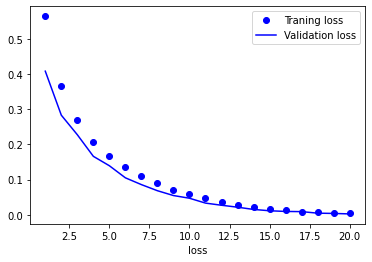

In [16]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
vall_loss_values = history_dict['val_loss']

epochs = range(1, 20+1)

plt.plot(epochs, loss_values, 'bo', label='Traning loss')
plt.plot(epochs, vall_loss_values, 'b', label='Validation loss')
plt.xlabel("epochs")
plt.xlabel("loss")
plt.legend()

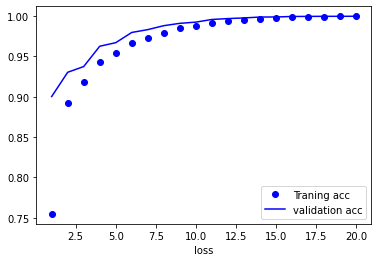

In [17]:
plt.clf()
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

plt.plot(epochs, acc_values, 'bo', label='Traning acc')
plt.plot(epochs,val_acc_values, 'b', label='validation acc')
plt.xlabel("epochs")
plt.xlabel("loss")
plt.legend()

In [18]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))
model.compile(optimizer = 'rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(partial_x_train, partial_y_train, epochs=4, batch_size=512, validation_data=(x_val, y_val))
result  = model.evaluate(x_test, y_test)

Epoch 1/4
20/20 [==============================] - 1s 38ms/step - loss: 0.5439 - accuracy: 0.7669 - val_loss: 0.3948 - val_accuracy: 0.8911
Epoch 2/4
20/20 [==============================] - 0s 23ms/step - loss: 0.3548 - accuracy: 0.8933 - val_loss: 0.2795 - val_accuracy: 0.9264
Epoch 3/4
20/20 [==============================] - 0s 25ms/step - loss: 0.2583 - accuracy: 0.9293 - val_loss: 0.2340 - val_accuracy: 0.9265
Epoch 4/4
782/782 [==============================] - 1s 2ms/step - loss: 0.3070 - accuracy: 0.8782


In [19]:
result

[0.30703338980674744, 0.8781599998474121]

In [20]:
model.predict(x_test)

array([[0.32986146],
       [0.99543226],
       [0.83543575],
       ...,
       [0.2066721 ],
       [0.15272513],
       [0.410258  ]], dtype=float32)